# Logistic Regression
Done by Srujan: 200240128033

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

In [2]:
def generate_data(noise):
    X,y = datasets.make_moons(n_samples=1000,shuffle=True,random_state=42,noise=noise)
    return X,y

In [3]:
class Perceptron:
    
    def __init__(self,l_rate,X,y):
        
        self.X = X
        self.y = y
        
        
        self.m = self.X.shape[0]  # m is number of samples in the dataset
        self.n = self.X.shape[1] # n in number of independent features
        
        self.l_rate = l_rate  # learning rate 
        
        self.W = np.random.rand(1,self.n) # initializing wrights and bias with random numbers
        self.b = np.random.rand(1,1)
        
    def sigmoid(self,x):
        
            return 1/(1+np.exp(-x)) 
        
    def forward_prop(self):
       
        self.Z = np.dot(self.X,self.W.T) + self.b 
        
        self.y_hat = self.sigmoid(self.Z)
    
    def backward_prop(self):
        
        self.y = self.y.reshape(self.y_hat.shape) # reshaping y into y_hat's shape to avoid wrong calculations 
        
        self.dZ = self.y_hat - self.y 
        
        self.dW = np.dot(self.dZ.T,self.X)
    
        self.db = np.sum(self.dZ,keepdims=True)
    
        self.W = self.W - self.l_rate * self.dW # updating weights
        self.b = self.b - self.l_rate * self.db # updating bias

    def cost(self):
        cost = -1 / self.m * np.sum( self.y * np.log( self.y_hat ) + (1-self.y) * ( np.log(1-self.y_hat) ) )
        return cost 

# Dataset with noise ratio 0.2

In [4]:
X,y = datasets.make_moons(n_samples=1000,shuffle=True,random_state=42,noise=0.2)

accuracy for learning rate 0.1 is 0.823 
 cost for learning rate 0.1 is 1.41020581378298
accuracy for learning rate 0.05 is 0.826 
 cost for learning rate 0.05 is 1.0402902893384869
accuracy for learning rate 0.02 is 0.848 
 cost for learning rate 0.02 is 0.38244255901586327
accuracy for learning rate 0.01 is 0.871 
 cost for learning rate 0.01 is 0.28549783276120744
accuracy for learning rate 0.005 is 0.871 
 cost for learning rate 0.005 is 0.28549783276120744


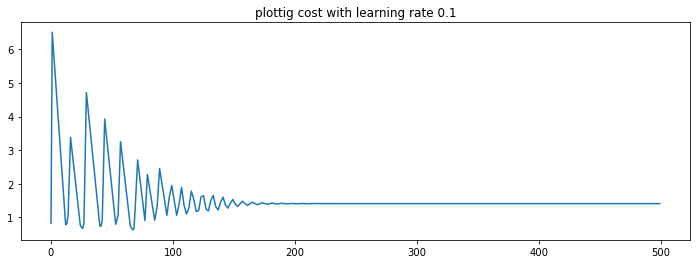

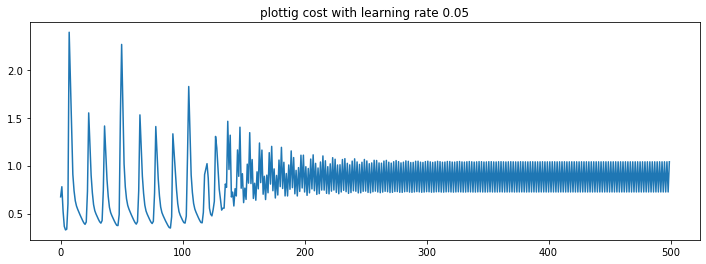

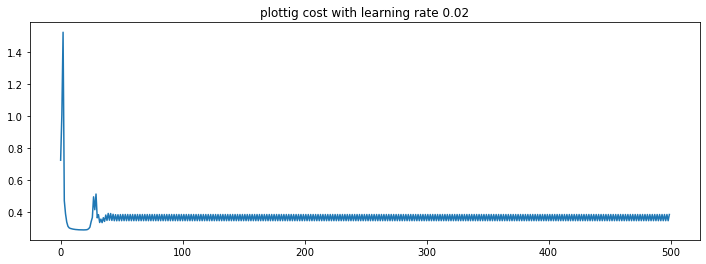

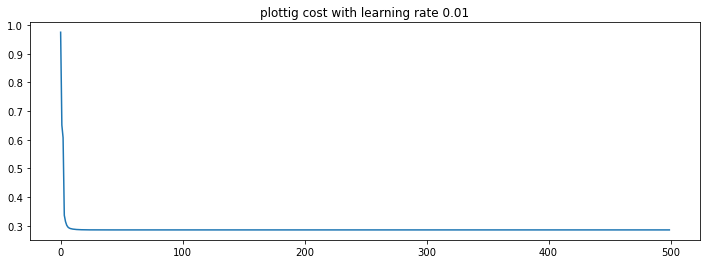

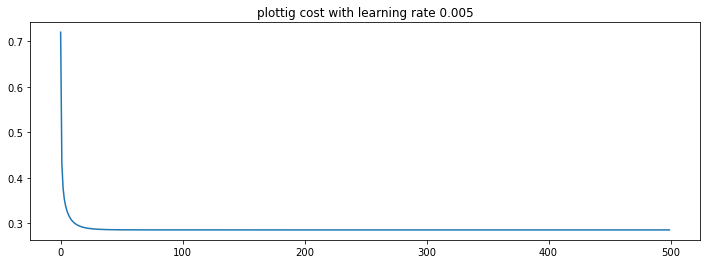

In [5]:
for lr in [0.1,0.05,0.02,0.01,0.005]:  # different learning rates
    
    cost = []
    p = Perceptron(lr,X,y)  # creating object
    
    for epoch in range(0,500): # training for  500 epochs 
        
        p.forward_prop() # forward propagation
        p.backward_prop() # backward propagation
        cost.append(p.cost()) # apend cost after every epoch to a list 
        
    plt.figure(figsize=(12,4)) # plotting cost for every learning rate
    x_vals = list(range(500))
    sns.lineplot(x=x_vals,y=cost)
    plt.title(f'plottig cost with learning rate {lr}')
    
    y_preds = [1 if i>0.5 else 0 for i in p.y_hat]  # converting output of sigmoid into predictions
    
    print(f'accuracy for learning rate {lr} is {accuracy_score(y,y_preds)} \n cost for learning rate {lr} is {cost[-1]}')

# Dataset with noise ratio 0.3

In [6]:
X,y = datasets.make_moons(n_samples=1000,shuffle=True,random_state=42,noise=0.3)

accuracy for learning rate 0.1 is 0.833 
 cost for learning rate 0.1 is 0.9764957279152775
accuracy for learning rate 0.05 is 0.71 
 cost for learning rate 0.05 is 1.1719176511748695
accuracy for learning rate 0.02 is 0.822 
 cost for learning rate 0.02 is 0.4374434716513556
accuracy for learning rate 0.01 is 0.853 
 cost for learning rate 0.01 is 0.3287732314537069
accuracy for learning rate 0.005 is 0.853 
 cost for learning rate 0.005 is 0.3287732314537069


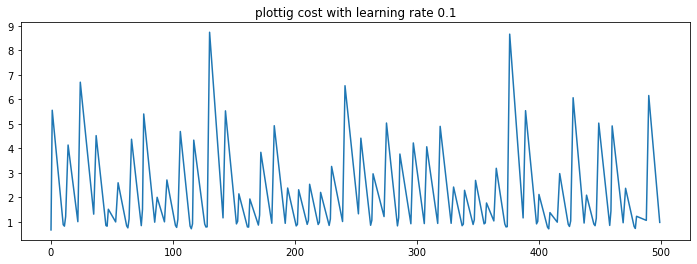

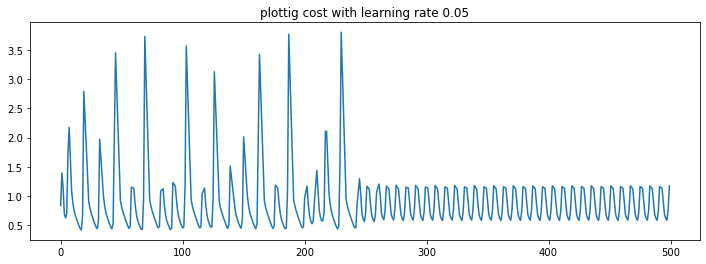

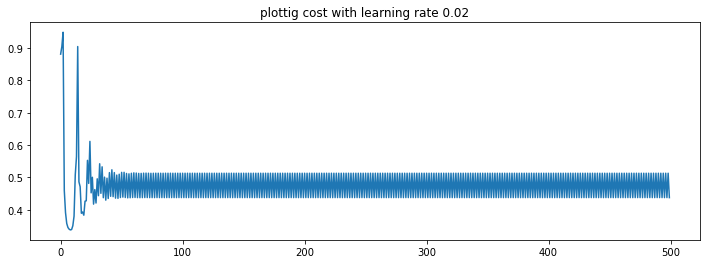

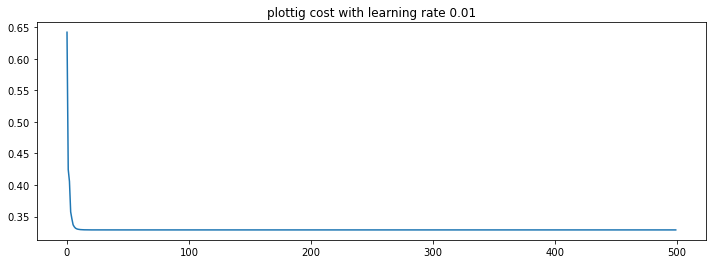

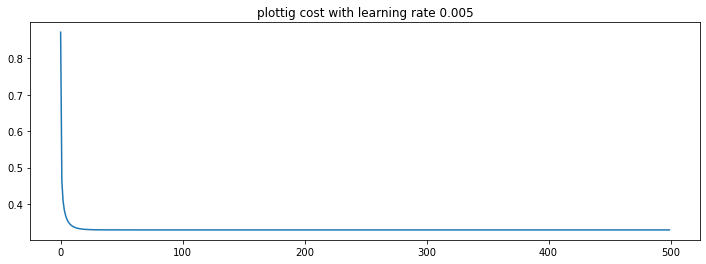

In [7]:
for lr in [0.1,0.05,0.02,0.01,0.005]:
    
    cost = []
    p = Perceptron(lr,X,y)  # creating object
    
    for epoch in range(0,500): # training for  500 epochs 
        
        p.forward_prop() # forward propagation
        p.backward_prop() # backward propagation
        cost.append(p.cost()) # apend cost after every epoch to a list 
        
    plt.figure(figsize=(12,4)) # plotting cost for every learning rate
    x_vals = list(range(500))
    sns.lineplot(x=x_vals,y=cost)
    plt.title(f'plottig cost with learning rate {lr}')
    
    y_preds = [1 if i>0.5 else 0 for i in p.y_hat]  # converting output of sigmoid into predictions
    
    print(f'accuracy for learning rate {lr} is {accuracy_score(y,y_preds)} \n cost for learning rate {lr} is {cost[-1]}')